# **LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [ ]:
from sklearn.utils.multiclass  import unique_labels

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# **DATASET**

In [ ]:
# Import the drive function from google.colab library.
from google.colab import drive

# Mount Google Drive into the Colab environment.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/df_statistic.pkl")
encoded_images = np.load("/content/drive/MyDrive/ProgettoDataMining/W.npy")
X = pd.DataFrame(encoded_images)
y = df["Label"]
df1 = pd.concat([X, y], axis=1)
path = "/content/drive/MyDrive/ProgettoDataMining/df_complete_statistic.pkl"
df1.to_pickle(path)"""

'df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/df_statistic.pkl")\nencoded_images = np.load("/content/drive/MyDrive/ProgettoDataMining/W.npy")\nX = pd.DataFrame(encoded_images)\ny = df["Label"]\ndf1 = pd.concat([X, y], axis=1)\npath = "/content/drive/MyDrive/ProgettoDataMining/df_complete_statistic.pkl"\ndf1.to_pickle(path)'

In [ ]:
# Upload the dataset.
df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/df_statistic2.pkl")

In [ ]:
# Count the unique values in the "Label" column of the DataFrame df and display the count of each unique label.
df["Label"].value_counts()

Label
notumor            1500
glioma             1426
pituitary tumor     930
meningioma          708
Name: count, dtype: int64

# **BALANCED SUBSAMPLE**

In [ ]:
# Define the number of samples to select for each class label.
num_for_each_class = 700
# Initialize an empty DataFrame that will store the balanced data.
new_df = pd.DataFrame()

# Iterate over each unique label in the original DataFrame.
for i in df["Label"].unique():
  # Print the current label (for monitoring purposes).
  print(i)
  # Create a subset of the original DataFrame containing only the rows with the current label.
  sample = df[df["Label"] == i]
  # Randomly select 700 samples from the filtred DataFrame.
  sample = sample.sample(n=num_for_each_class, random_state=42)
  # Concatenate the sampled subset to the new DataFrame.
  new_df = pd.concat([new_df, sample])

notumor
glioma
meningioma
pituitary tumor


In [ ]:
# Display the new DataFrame.
new_df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Label
3406,0.000000,0.000000,0.030481,0.111523,0.000000,0.000000,0.000000,0.027530,0.009389,0.030529,...,0.000000,0.245604,0.104333,0.201886,0.000000,0.051350,0.000000,0.000000,0.081006,notumor
4170,0.000000,0.000000,0.013988,0.007746,0.030613,0.046876,0.000000,0.030550,0.000000,0.011318,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.129474,0.235929,0.000000,0.000000,notumor
1270,0.018946,0.000000,0.000000,0.201267,0.000000,0.016790,0.109721,0.000000,0.041440,0.000000,...,0.143548,0.000000,0.000000,0.039430,0.166074,0.000000,0.000000,0.001591,0.021613,notumor
1229,0.000000,0.000000,0.000000,0.120025,0.000000,0.000000,0.000000,0.021770,0.000000,0.058064,...,0.000000,0.391378,0.000000,0.000000,0.365067,0.000000,0.000000,0.000000,0.000000,notumor
1340,0.020294,0.000000,0.045492,0.063340,0.081659,0.000000,0.000000,0.067085,0.014198,0.000000,...,0.000000,0.057348,0.000000,0.000000,0.000000,0.041907,0.010764,0.000000,0.000000,notumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,0.000000,0.000000,0.000000,0.000000,0.000000,0.417495,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061887,0.000000,0.280589,pituitary tumor
2010,0.000000,0.148561,0.121460,0.000000,0.000000,0.000000,0.000000,0.000000,0.862184,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.024427,0.000000,7.625564,0.000000,0.065773,pituitary tumor
4377,0.000000,0.059218,0.000000,0.027670,0.000000,0.000000,0.331674,0.000000,0.000000,0.000000,...,1.070234,0.000000,0.000000,0.000000,0.439996,0.385793,29.202197,0.098716,3.165074,pituitary tumor
2604,0.000000,0.668777,0.191697,0.000000,0.000000,0.000000,0.000000,0.000000,4.211883,0.000000,...,0.000000,0.519825,0.000000,0.327882,1.594450,0.000000,10.470703,0.000000,0.000000,pituitary tumor


# **DATA PREPARATIONS**

In [ ]:
# Remove the column named Label from the DataFrame 'new_df' to obtain the features matrix X.
X = new_df.drop('Label', axis=1, inplace=False)

In [ ]:
# Extract the class labels associated with each sample from the DataFrame 'new_df' and assign them to the variable y.
y = new_df["Label"].copy()

In [ ]:
# Obtain the unique class labels from the variable y and store them in the array 'labels'.
labels = y.unique()

In [ ]:
# Split the data into training and test sets with a test size of 25% (and training size of 75%).
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

# Print out the proportion of each class in both the training and test sets.
print("Proportion of training classes:")
print(y_train.value_counts(normalize=True))

print("\nProportion of test classes:")
print(y_test.value_counts(normalize=True))

Proportion of training classes:
Label
pituitary tumor    0.25
notumor            0.25
glioma             0.25
meningioma         0.25
Name: proportion, dtype: float64

Proportion of test classes:
Label
glioma             0.25
meningioma         0.25
pituitary tumor    0.25
notumor            0.25
Name: proportion, dtype: float64


In [ ]:
# Convert the column names of the DataFrame X into a new array features_name where each column name is represented as a string.
features_name = X.columns.astype(str)

In [ ]:
# Reset the index to create a range of indices from 0 to len(X)-1.
index = np.arange(len(X))

# Calculate the split index based on the test size. split_index marks the boundary between the training and test sets.
split_index = int(len(index) * (1-test_size))

# Divide the index array into two parts: train_index, containing the indices for the training set; test_index, containing the indices for the test set.
train_index = index[:split_index]
test_index = index[split_index :]

In [ ]:
#X_train = X_train.set_index(train_index, drop=True)
#X_test = X_test.set_index(test_index, drop=True)

# Assign the new training and test indices to X_train, X_test, y_train, and y_test to maintain the alignment between features and labels, as well as between training and testing datasets.
X_train.index = train_index
X_test.index = test_index
y_train.index = train_index
y_test.index = test_index

# **FUNCTION TO EVALUATE MODEL'S PERFORMANCE**

In [ ]:
# Define a function to evaluate the performance of a classification model using various metrics and visualizations.
def evaluate_metrics(y_pred,y_test):
    # Obtain and print unique labels from y_test and y_pred.
    labels = unique_labels(y_test,y_pred)
    print(labels)
    # Generate and print a classification report showing precision, recall, F1-score, and support for each class.
    report = classification_report(y_test, y_pred, target_names=labels)
    print(report)
    # Add spacing for clarity.
    print( "\n"*5)
    # Generate and display a confusion matrix.
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    plt.figure(figsize=(8, 6))
    cm_display.plot()
    plt.title('Confusion Matrix')
    plt.show()

# **SVC**

## **Fine Tuning**

The Model is trained well with the given images
{'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'coef0': 1, 'C': 0.1}
SVC(C=0.1, coef0=1, degree=2, gamma=0.1, kernel='linear', probability=True)
Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.79      0.69      0.74       175
     meningioma       0.72      0.75      0.73       175
        notumor       0.96      0.99      0.97       175
pituitary tumor       0.87      0.91      0.89       175

       accuracy                           0.84       700
      macro avg       0.83      0.84      0.83       700
   weighted avg       0.83      0.84      0.83       700









<Figure size 800x600 with 0 Axes>

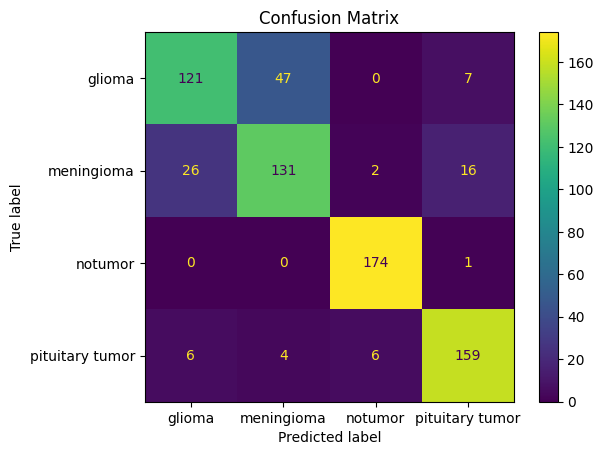

Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.86      0.73      0.79       525
     meningioma       0.76      0.80      0.78       525
        notumor       0.96      0.99      0.98       525
pituitary tumor       0.89      0.95      0.92       525

       accuracy                           0.87      2100
      macro avg       0.87      0.87      0.87      2100
   weighted avg       0.87      0.87      0.87      2100









<Figure size 800x600 with 0 Axes>

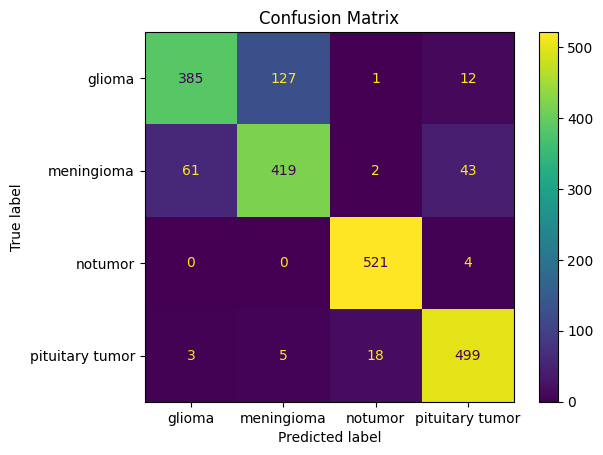

In [ ]:
# Import necessary libraries and modules.
from sklearn.svm import SVC
import joblib
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import gc

# Define parameters for hyperparameter tuning.
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0, 1]
}

# Initialize the SVC model.
svc = SVC(probability=True)

# Configure RandomizedSearchCV to perform hyperparameter tuning.
random_search = RandomizedSearchCV(
    svc,
    param_distributions,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    refit=True,
    random_state=42
)

# Fit the RandomizedSearchCV model to the training data.
random_search.fit(X_train, y_train)
print('The Model is trained well with the given images')

# Store and print the best set of hyperparameters.
best_params = random_search.best_params_
print(best_params)

# Print the best model with the optimal hyperparameters.
print(random_search.best_estimator_)
svc_best_model = random_search.best_estimator_

# Predict on the test set.
y_pred = svc_best_model.predict(X_test)

# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred, y_test)

# Free up memory by deleting variables no longer needed.
del y_pred, random_search
gc.collect()

# Evaluate and print the performance metrics of the model on the training set predictions.
print("Train")
evaluate_metrics(svc_best_model.predict(X_train), y_train)

## **SVC with features selection**

In [ ]:
# Upload the DataFrame with the selected features.
df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/selected_df.npy")

In [ ]:
# Remove the column named Label from the DataFrame 'new_df' to obtain the features matrix X.
X_New = df.drop('Label', axis=1, inplace=False)

In [ ]:
# Extract the class labels associated with each sample from the DataFrame 'new_df' and assign them to the variable y.
y = df["Label"].copy()

In [ ]:
# Obtain the unique class labels from the variable y and store them in the array 'labels'.
labels = y.unique()

In [ ]:
# Split the data into training and test sets with a test size of 25% (and training size of 75%).
Test_Size = 0.25
X_Train_New, X_Test_New, y_Train_New, y_Test_New = train_test_split(X_New, y, test_size=Test_Size, stratify=y, random_state=42)

In [ ]:
# Import necessary libraries and modules.
from sklearn.svm import SVC
import joblib
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import gc

best_params = {
    'C': 0.1,
    'gamma': 0.1,
    'kernel': 'linear',
    'degree': 2,
    'coef0': 1
}

# Initialize a SVC model.
svc_new = SVC(**best_params, random_state=40)

# Train the model on the training data.
svc_new.fit(X_Train_New, y_Train_New)

SVC(C=0.1, coef0=1, degree=2, gamma=0.1, kernel='linear', random_state=40)

In [ ]:
# Make predictions on the test data.
y_pred_new = svc_new.predict(X_Test_New)

Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.61      0.27      0.37       175
     meningioma       0.51      0.43      0.46       175
        notumor       0.56      0.97      0.71       175
pituitary tumor       0.75      0.74      0.75       175

       accuracy                           0.60       700
      macro avg       0.61      0.60      0.57       700
   weighted avg       0.61      0.60      0.57       700









<Figure size 800x600 with 0 Axes>

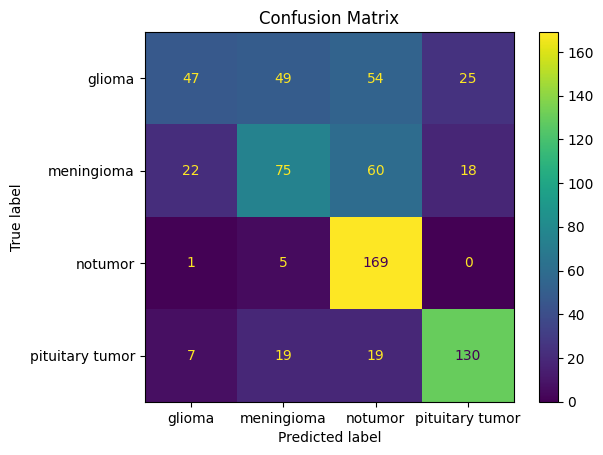





Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.65      0.29      0.40       525
     meningioma       0.46      0.40      0.43       525
        notumor       0.55      0.94      0.69       525
pituitary tumor       0.75      0.74      0.75       525

       accuracy                           0.59      2100
      macro avg       0.60      0.59      0.57      2100
   weighted avg       0.60      0.59      0.57      2100









<Figure size 800x600 with 0 Axes>

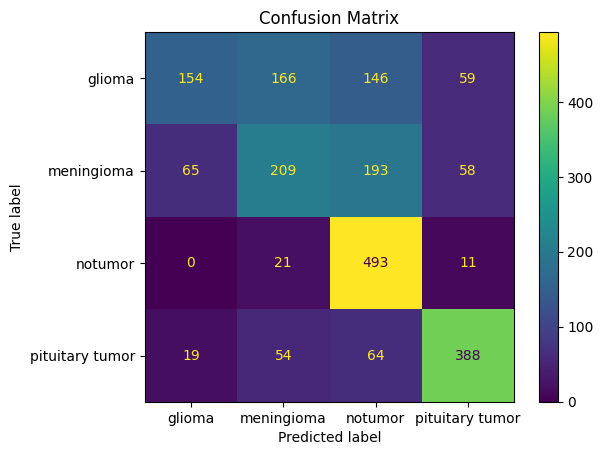

In [ ]:
# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred_new, y_Test_New)

# Add space for clarity.
print("\n"*3)

# Evaluate and print the performance metrics of the model on the training set predictions.
print("Train")
evaluate_metrics(svc_new.predict(X_Train_New), y_Train_New)

# **SAVINGS**

In [ ]:
import joblib

In [ ]:
model_path = '/content/drive/MyDrive/ProgettoDataMining/svc.pkl'

# Save the SVC model with the optimal set of hyperparameters obtained with RandomizedSearchCV using joblib.
joblib.dump(svc_best_model, model_path)